### Author: Bogdan Bintu (bbint@ucsd.edu)

#### This is intended to demonstrate how to analysise the raw data files in order to classify and segment 

In [ ]:
import sys
import glob,sys,os
import numpy as np
#sys.path.append(r'path_to_files')
import OR_MER_Analyser as oma
import matplotlib.pyplot as plt
reload(oma)

In [ ]:
### The main class handling the analysis is the OR_cropper within OR_MER_Analyser
### Construct this class and run the data
or_chr = oma.OR_cropper()

# Define paramaters

or_chr.paramater_dic = {'device':'microscope_name',#misc paramaters
                                  'cell_diameter':56,#diamater of cell in xy camera pixels
                                  'nm_per_pixel_xy':162,#pixel size in nm
                                  'nm_per_pixel_z':500,#z step size of stage in nm
                                  'perc_baseline':0.1,'bleed_factor':10,#paramaters for bleedthrough correction if used
                                  'hybeindex':[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,0,0],#paramaters for bleedthrough order
                                  'ref_fl':0,"reg_frame":77,"local_mean_size":50,#drif correction paramaters -> self.correct_drift
                                  'lib_remap':[1,2,3,4,5,6,7,8,9,10,11],#this is to correct a naming error -> self.cross_corrs_decode
                                  'lib_fl':r'\SI8.fasta',#library used to decode cells #change this to csv format
                                  'nRs':15,'nOn':4,'pad_xy':20,'pad_z':8,'spacing_xy':6,'spacing_z':3,'target_z':None,
                                   'stages_z':None,#correlation paramaters -> self.cross_corrs_decode
                                  'th_bk':3.5, #units of standard deviation above the mean to get called as a valuable pixel in (decoded - background) -> self.decoded_main
                                  'th_dec':0.6, #min cross-corr -> self.decoded_main
                                  'dbscan_corr_eps':4, #around the cell diamater in reduced coordinates -> self.decoded_main
                                  'dbscan_corr_min_samples':5,#patches to accept clusters -> self.decoded_main
                                  'dbscan_fr':2.35,
                                  'background_threshold':0.4,#threshold background -> self.decoded_background
                                   'semiloosepoints_min':750,
                                    'volume_min':5000,
                                   }#Force redo analysis

#Define where the dataset is located and where to save the analysis

dataset = ['path_to_the_raw_data']
if '3col' in dataset[0]: or_chr.paramater_dic['device']+='_3col'
save_folder = r'path_to_analysis_folder'
or_chr.load_data(dataset,save_folder=save_folder,force_remap=True)
print len(or_chr.files),save_folder
print(or_chr.files[0])

### Flatten the field across the used color channels

In [ ]:
for ifr,frm in enumerate([76,77,78,79]):
    print "Flattening frame: "+str(frm)
    im_cor = or_chr.correction_image(frm,set_fl=2,perc_=95,save_note=str(ifr),save_file='auto',overwrite=False)


### Construct dapi file

Assemble the individual fields of view into a mosaic which reveals the organization of the slices

In [ ]:
import os
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
fls = [fls[1] for fls in or_chr.files[:]]
fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.split('.dax')[0]+'.xml')][:]
oma.save_tile_image_and_labelV2(fls,dapi_file,resc=4,
                              custom_frms=[3+100],pix_size_=0.162,
                                    max_impose=True,verbose=True,
                                          rotation_angle=1.5,add_txt=False,norm_dapi=False,invertY=True,invertX=False,max_clip=False)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x3d9a41c8>)

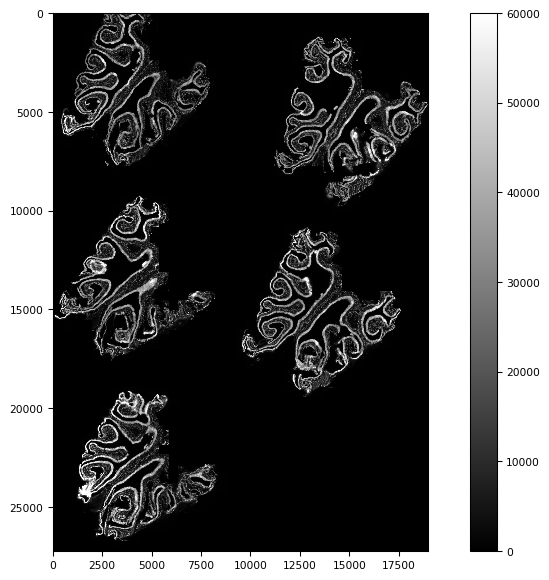

In [4]:
import tifffile
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
im1 = tifffile.imread(dapi_file)
tifffile.imshow(im1,vmax=60000,interpolation='nearest',cmap='gray')

### Construct tiles for other channels 

Note: this is purely to visualize the data

In [10]:
import os
save_file = or_chr.save_folder+os.sep+'Tiles'+os.sep+'EGR1_100x_resc1_slice1.tiff'
if not os.path.exists(os.path.dirname(save_file)):
    os.makedirs(os.path.dirname(save_file))

reload(oma)
fls = [fls[0] for fls in or_chr.files[:]]
#fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.replace('.dax','.xml'))][:]
fls = np.array(fls)[kmeans.labels_==icluster]#[:20]
custom_frames = np.arange(2,200,4)#[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197]
oma.save_tile_image_and_labelV2(fls,save_file,resc=1,
                              custom_frms=custom_frames,pix_size_=0.162,
                                    max_impose=True,verbose=True,
                                          rotation_angle=0,add_txt=False,norm_dapi=False,invertY=True,invertX=False,transpose=True)
htags = [os.path.basename(os.path.dirname(fld))for fld in or_chr.files[0]]

In [12]:
import os
save_file = or_chr.save_folder+os.sep+'Tiles'+os.sep+'dapi_100x_resc1_slice1.tiff'
if not os.path.exists(os.path.dirname(save_file)):
    os.makedirs(os.path.dirname(save_file))

reload(oma)
fls = [fls[0] for fls in or_chr.files[:]]
#fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.replace('.dax','.xml'))][:]
fls = np.array(fls)[kmeans.labels_==icluster]#[:20]
custom_frames = np.arange(3,200,4)[[20]]#[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197]
oma.save_tile_image_and_labelV2(fls,save_file,resc=1,
                              custom_frms=custom_frames,pix_size_=0.162,
                                    max_impose=True,verbose=True,
                                          rotation_angle=0,add_txt=False,norm_dapi=False,invertY=True,invertX=False,transpose=True)
htags = [os.path.basename(os.path.dirname(fld))for fld in or_chr.files[0]]

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


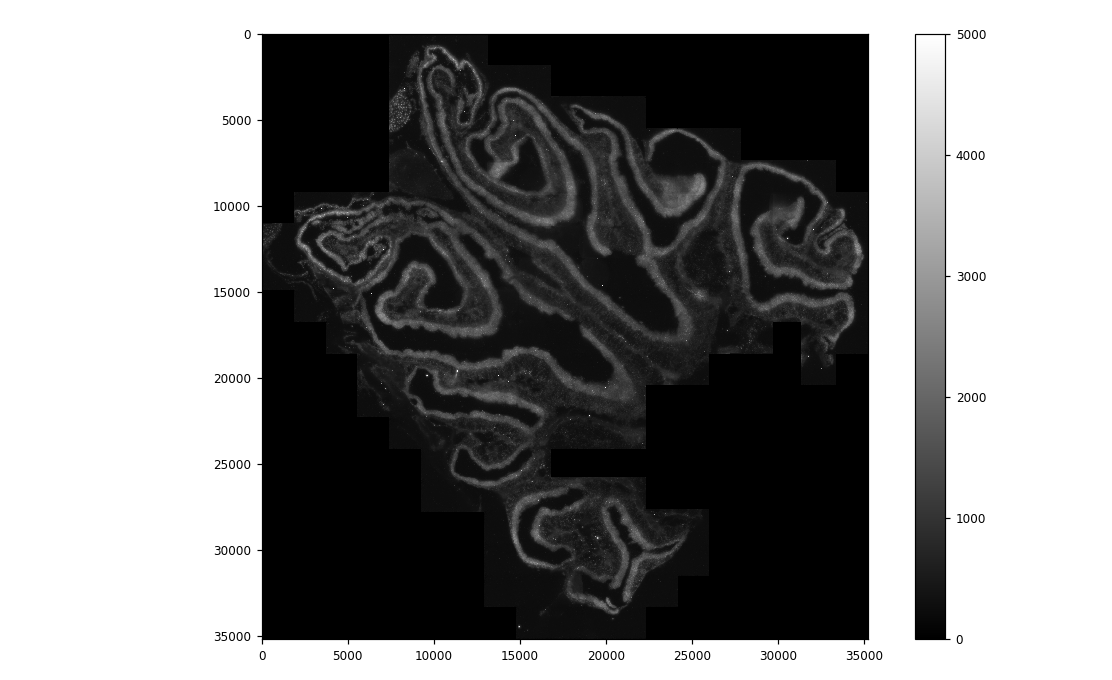

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x5c1b6888>)

In [76]:
import tifffile
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'EGR1_100x_resc1_slice1.tiff'
im1 = tifffile.imread(dapi_file)
tifffile.imshow(im1,vmax=5000,interpolation='nearest',cmap='gray')

### Run convolutional neural network  (CNN) model to classify the segment the MOE such that the MERFISH analysis can focus on the only this tissue region

Note: the file is a jupyter notebook called: CNN_MOE_Mask

In [ ]:
#____________

### Check EGR/Rs

In [ ]:
import os
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'Xcfos_100x_resc2.tiff'
or_chr.save_tile_image([fls[0] for fls in or_chr.files[:50]],
                        dapi_file,
                        start_frame=3-2,resc=2,color_map=None,custom_frms=np.arange(0,150,4),#[103-2],target_z=None,
                       pix_size_=0.108*6/4.,max_impose=False,verbose=True,correction=True)

In [ ]:
import os
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
reload(oma)
fls = [fls[1] for fls in or_chr.files[:]]
fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.replace('.dax','.xml'))][:]
oma.save_tile_image_and_labelV2(fls,dapi_file,resc=4,
                              custom_frms=[103],pix_size_=0.162,
                                    max_impose=True,verbose=True,
                                          rotation_angle=1.5,add_txt=False,norm_dapi=False,invertY=True,invertX=False,max_clip=False)

### Define main function for analysis and run batched in jupyter notebook

In [ ]:
def main_func(index,dataset=dataset,save_folder=save_folder,return_obj=False):
   
    import numpy as np
    import sys
    import glob,sys,os
    import numpy as np
    sys.path.append(r'absolute_path_to_where_OR_MER_Analyser_is')
    import OR_MER_Analyser as oma
    import matplotlib.pyplot as plt
    reload(oma)
    import tifffile
    or_chr = oma.OR_cropper()
    or_chr.paramater_dic = {'device':'STORM65',#misc paramaters
                                      'cell_diameter':56,#diamater of cell in xy camera pixels
                                      'nm_per_pixel_xy':162,#pixel size in nm
                                      'nm_per_pixel_z':500,#z step size of stage in nm
                                      'perc_baseline':0.1,'bleed_factor':10,#paramaters for bleedthrough
                                      'hybeindex':[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,0,0],#paramaters for bleedthrough
                                      'ref_fl':0,"reg_frame":77,"local_mean_size":50,#drif correction paramaters -> self.correct_drift
                                      'lib_remap':[1,2,3,4,5,6,7,8,9,10,11],#this is to correct a naming error -> self.cross_corrs_decode
                                      'lib_fl':r'C:\Users\Bogdan\Dropbox\code_Seurat\OR_MERFISH_2019\SI8.fasta',#library used to decode cells #change this to csv format
                                      'nRs':15,'nOn':4,'pad_xy':20,'pad_z':8,'spacing_xy':6,'spacing_z':3,'target_z':None,
                                       'stages_z':None,#correlation paramaters -> self.cross_corrs_decode
                                      'th_bk':3.5, #units of standard deviation above the mean to get called as a valuable pixel in (decoded - background) -> self.decoded_main
                                      'th_dec':0.6, #min cross-corr -> self.decoded_main
                                      'dbscan_corr_eps':4, #around the cell diamater in reduced coordinates -> self.decoded_main
                                      'dbscan_corr_min_samples':5,#patches to accept clusters -> self.decoded_main
                                      'dbscan_fr':2.35,
                                      'background_threshold':0.4,#threshold background -> self.decoded_background
                                       'semiloosepoints_min':750,
                                        'volume_min':5000,
                                       }#Force redo analysis


    overwrite = False

    if '3col' in dataset[0]: or_chr.paramater_dic['device']+='_3col'
    or_chr.load_data(dataset,save_folder=save_folder,force_remap=True)
    
    if index<len(or_chr.files):
        or_chr.index_fov=index
        or_chr.fov_name = os.path.basename(or_chr.files[or_chr.index_fov][0]).replace('.zst','')
        main_save_file = or_chr.save_folder+os.sep+'Decoded'+os.sep+or_chr.fov_name.replace('.dax','__decoded_dic_v2.npy')
        if not os.path.exists(main_save_file) or overwrite:
            def run():
                im_msk = or_chr.im_MOEmask(or_chr.fov_name)
                if np.any(im_msk>0): 
                    or_chr.load_index(correct_drift=True)
                    print("Restructuring...")
                    or_chr.apply_matrix_convention()
                    
                    if False:
                        save_bil_fld = r'\\10.245.74.51\mcclintock_3\Bogdan_Bil_temporary'+os.sep+os.path.basename(dataset[0]).split('_set')[0]
                        if not os.path.exists(save_bil_fld): os.makedirs(save_bil_fld)
                        ifov = or_chr.fov_name.split('_')[-1].split('.')[0]
                        save_bil_fl = save_bil_fld+os.sep+r'aligned_images_'+ifov+'.tif'
                    
                        ims_matrix_ = or_chr.ims_matrix.astype(np.uint16)
                        ims_matrix_[-2] = or_chr.dic_fov['DAPI0']
                        ims_matrix_[-2],ims_matrix_[-1]=ims_matrix_[-1].copy(),ims_matrix_[-2].copy()
                        ims_matrix_ = ims_matrix_.reshape([-1,2048,2048])
                        
                        
                        tifffile.imwrite(save_bil_fl,ims_matrix_)
                        del ims_matrix_
                    print("Flattening...")
                    or_chr.apply_flatfield()#16Gb
                    print("Computing cross correlation...")
                    or_chr.cross_cors_3D_patch(save_file='auto',overwrite=False,savePickle=False)#17Gb - 20 min optimizd
                    print("Decoding cross correlation...")
                    or_chr.cross_corrs_decode()#Spikes at 80Gb, settles at 26Mb - fas
                    print("Find rough cells...")
                    or_chr.decoded_main_v2(lib_keep=None,plt_val=False,save_data=False)#26Mb - fast
                    del or_chr.im_decoded
                    print("Refine cells step 1...")
                    or_chr.decoded_pixelIntensities_v2()#takes ~7min with ~3 it/sec - optimized #26Mb
                    print("Remove overlap...")
                    or_chr.decoded_overlap_v2()#26Mb - fast
                    print("Refine cells step 2...")
                    or_chr.decoded_refine()#26Mb - fast
                    print("Get EGR number of molecules...")
                    or_chr.get_dic_int_v2(h_cutoff = 1.35,refit =True)#26Mb - fast
                    print("Save fov data...")
                    or_chr.decoded_save_v2(save_fov=True,save_cells=True,save_dic=False)
            def failed():
                print "Failed..."
                save_fail = or_chr.save_folder+os.sep+'Fails'
                if not os.path.exists(save_fail): os.makedirs(save_fail)
                fid = open(save_fail+os.sep+'Index_'+str(index)+'.txt','w')
                fid.close()
            if return_obj:
                run()
                return or_chr
            else:
                try:#if True:#
                    run()
                except:#else:#
                    failed()

### Check status of analysis

In [13]:
import os,glob
len(glob.glob(save_folder+os.sep+'Decoded'+os.sep+'*__decoded_dic_v2.npy'))

0

### Example output for field of view 30 within a dataset

In [11]:
or_chr = main_func(30,return_obj=True)

Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H0EGR1,cfos\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H1R1,2,3;TEGR1\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H2R4,5,6;T1,2,3\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H3R7,8,9;T4,5,6\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H4R10,11,12;T7,8,9\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H5R14,15,13;T10,11,12\Conv_zscan_0030.dax.zst
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'back


Loaded and drift corrected images!
Restructuring...
Flattening...
Computing cross correlation...
Time for 3D cross_cors:  888.621999979
Decoding cross correlation...
Please run cross_cors_2/3D_patch functions first.
Time for decoding:  161.98300004
Find rough cells...



Refine cells step 1...



Remove overlap...
Checking overlap...



Refine cells step 2...



Get EGR number of molecules...



Save fov data...


C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\matplotlib\colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


### Run analysis in batch on multiple processes

In [ ]:
#Run in terminal
#ipcluster start -n 20<put desired number of engines to run here>
from ipyparallel import Client
rc = Client()
print(len(rc),len(or_chr.files))a

dv = rc[:10]
dv.map_sync(main_func,range(len(or_chr.files)));